In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("Q3_data.csv")

In [ ]:
data.head()

,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['label'].value_counts()

4    6000
3    6000
2    6000
1    6000
Name: label, dtype: int64

In [ ]:
data.shape

(24000, 785)

a) Split data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20, random_state= 27)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
#pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train = np.round(train.drop(['label'], axis = 1)/255, 3)
X_test = np.round(test.drop(['label'], axis = 1)/255, 3)

In [ ]:
y_train = train['label']
y_test = test['label']

In [ ]:
y_train = y_train - 1
#y_train.value_counts()
y_test = y_test-1

In [ ]:
X_train = torch.tensor(X_train.to_numpy())
X_test = torch.tensor(X_test.to_numpy())
y_train = torch.tensor(y_train.to_numpy())
y_test = torch.tensor(y_test.to_numpy())

In [ ]:
X_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

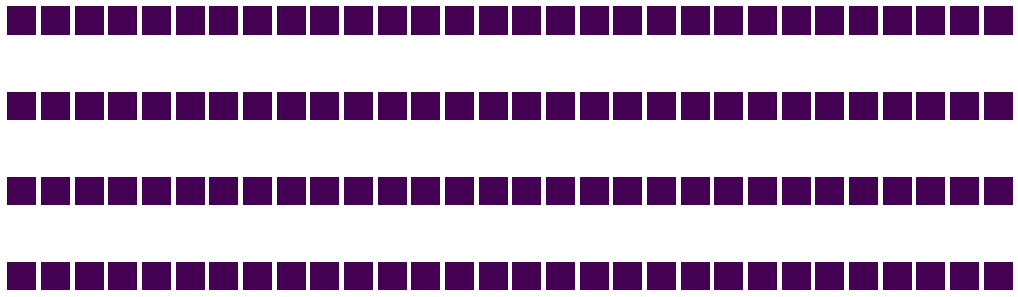

In [ ]:
sample = np.unique(y_train)
M=30
fig, axs = plt.subplots(len(sample), M, figsize = (18,6))
for i,d in enumerate(sample):
  for j in range(M):
    axs[i,j].imshow(y_train.data[y_train==d][j].reshape(1,1))
    axs[i,j].axis('off')

In [ ]:
X_train[10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
y_train = y_train.float()
y_test = y_test.float()

In [ ]:
from torch.utils.data import TensorDataset
train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)

In [ ]:
train

b) MLP

In [ ]:
batch_size = 512
train_loader_multi = torch.utils.data.DataLoader(train, batch_size=batch_size)
test_loader_multi = torch.utils.data.DataLoader(test, batch_size=batch_size)

In [ ]:
class MLP_multi(nn.Module):
  def __init__(self):
    super(MLP_multi, self).__init__()
    self.fc1=nn.Linear(784, 512) #input layer
    self.fc2=nn.Linear(512, 128)
    self.fc3=nn.Linear(128, 128)
    self.fc4=nn.Linear(128, 64)
    self.fc5=nn.Linear(64, 4) #output layer

  def forward(self, x):
    x=x.view(-1, 784)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=torch.relu(self.fc3(x))
    x=torch.relu(self.fc4(x))
    x=torch.softmax(self.fc5(x), dim=1)
    return (x)

model=MLP_multi()
print(model)

MLP_multi(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=4, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 200
#Y_train = torch.FloatTensor(Y_train)

model.train()
errors = np.zeros(n_epochs)
for epoch in range(n_epochs):
  train_loss = 0.0
  for data, label in train_loader_multi:
    optimizer.zero_grad()
    output = model(data.float())
    loss = criterion(output, label.long())
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader_multi.dataset)
  errors[epoch] = train_loss
  if(epoch+1)%10 == 0:
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))

Epoch: 10 	Training Loss: 1.386237
Epoch: 20 	Training Loss: 1.386204
Epoch: 30 	Training Loss: 1.386171
Epoch: 40 	Training Loss: 1.386138
Epoch: 50 	Training Loss: 1.386106
Epoch: 60 	Training Loss: 1.386075
Epoch: 70 	Training Loss: 1.386044
Epoch: 80 	Training Loss: 1.386013
Epoch: 90 	Training Loss: 1.385983
Epoch: 100 	Training Loss: 1.385952
Epoch: 110 	Training Loss: 1.385921
Epoch: 120 	Training Loss: 1.385890
Epoch: 130 	Training Loss: 1.385859
Epoch: 140 	Training Loss: 1.385827
Epoch: 150 	Training Loss: 1.385795
Epoch: 160 	Training Loss: 1.385762
Epoch: 170 	Training Loss: 1.385729
Epoch: 180 	Training Loss: 1.385696
Epoch: 190 	Training Loss: 1.385661
Epoch: 200 	Training Loss: 1.385626


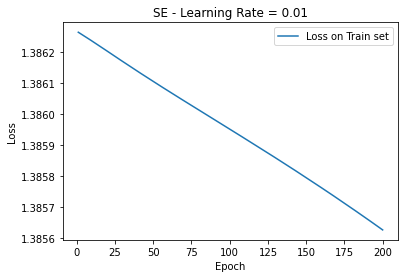

In [ ]:
x = np.arange(1, len(errors)+1)
plt.plot(x, errors, label="Loss on Train set")
plt.legend()
plt.title('SE - Learning Rate = 0.01')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader_multi:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data.float())
    output = output.squeeze()
    # calculate the loss
    loss = criterion(output, target.long())
    # update test lo ss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    
    for i in range(192):
      label = target.data[i].long()
      #print(label)
      #print(correct[i])
      class_correct[label] += correct[i].item()
      class_total[label] += 1
      test_loss = test_loss/len(test_loader_multi.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(4):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (str(i), 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % str(i))
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.000000

Test Accuracy of     0:  0% ( 0/496)
Test Accuracy of     1: 100% (499/499)
Test Accuracy of     2:  0% ( 0/467)
Test Accuracy of     3:  0% ( 0/458)

Test Accuracy (Overall): 25% (499/1920)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
data_cnn = pd.read_csv("Q3_data.csv")
data_cnn.head()

,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature744,feature745,feature746,feature747,feature748,feature749,feature750,feature751,feature752,feature753,feature754,feature755,feature756,feature757,feature758,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768,feature769,feature770,feature771,feature772,feature773,feature774,feature775,feature776,feature777,feature778,feature779,feature780,feature781,feature782,feature783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_cnn, test_cnn = train_test_split(data_cnn, test_size = .20, random_state=27)
X_train_cnn = train_cnn.drop(['label'], axis=1)
X_test_cnn = test_cnn.drop(['label'], axis=1)
y_train_cnn = train_cnn['label']
y_test_cnn = test_cnn['label']

In [ ]:
X_train_cnn = torch.tensor(X_train_cnn.to_numpy())
X_test_cnn = torch.tensor(X_test_cnn.to_numpy())
y_train_cnn = torch.tensor(y_train_cnn.to_numpy())
y_test_cnn = torch.tensor(y_test_cnn.to_numpy())

In [ ]:
X_train_cnn = np.asarray(X_train_cnn).reshape(19200, 1, 1, 784)
X_test_cnn = np.asarray(X_test_cnn).reshape(4800, 1, 1, 784)
y_train_cnn = np.asarray(y_train_cnn).reshape(19200)
y_test_cnn = np.asarray(y_test_cnn).reshape(4800)

In [ ]:
print(X_train_cnn.data.shape) 
print(y_train_cnn.data.shape)

(19200, 1, 1, 784)
(19200,)


In [ ]:
print(X_test_cnn.data.shape) 
print(y_test_cnn.data.shape)

(4800, 1, 1, 784)
(4800,)


In [ ]:
train_cnn = TensorDataset(torch.FloatTensor(X_train_cnn), torch.FloatTensor(y_train_cnn))
test_cnn = TensorDataset(torch.FloatTensor(X_test_cnn), torch.FloatTensor(y_test_cnn))

train_loader_cnn = torch.utils.data.DataLoader(dataset=train_cnn, batch_size=4, shuffle=True, 
                                               num_workers=1,pin_memory=True)
test_loader_cnn = torch.utils.data.DataLoader(dataset=test_cnn, batch_size=4, shuffle=True, 
                                               num_workers=1,pin_memory=True)

In [ ]:
train_cnn_itr = iter(train_loader_cnn)
images, label = train_cnn_itr.next()

In [ ]:
from torch.nn import Linear, ReLU, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer 1
            Conv2d(1, 8, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(8),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1),
            # Defining 2D convolution layer 2
            Conv2d(8, 4, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1),
            # Defining 2D convolution layer 3
            Conv2d(4, 4, kernel_size=2, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=1),
        )

        self.linear_layers = Sequential(
            Linear(16 * 7 * 7, 4)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.linear_layers(x)
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = torch.softmax(x, dim=1)
        return x
model_cnn = Net()
print(model_cnn)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(8, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(4, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=784, out_features=4, bias=True)
  )
)


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.001)
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = train_cnn_itr.next()
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training
    output_train = model_cnn(x_train)
    #print("output", output_train)

    # computing the training
    loss_train = criterion(output_train, y_train.long())
    #print("loss_train", loss_train)
    train_losses.append(loss_train)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_train)

In [ ]:
n_epochs = 200
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.7717, grad_fn=<NllLossBackward0>)
Epoch :  3 	 loss : tensor(2.7653, grad_fn=<NllLossBackward0>)
Epoch :  5 	 loss : tensor(2.7801, grad_fn=<NllLossBackward0>)
Epoch :  7 	 loss : tensor(2.7636, grad_fn=<NllLossBackward0>)
Epoch :  9 	 loss : tensor(2.7763, grad_fn=<NllLossBackward0>)
Epoch :  11 	 loss : tensor(2.7883, grad_fn=<NllLossBackward0>)
Epoch :  13 	 loss : tensor(2.7775, grad_fn=<NllLossBackward0>)
Epoch :  15 	 loss : tensor(2.7279, grad_fn=<NllLossBackward0>)
Epoch :  17 	 loss : tensor(2.7601, grad_fn=<NllLossBackward0>)
Epoch :  19 	 loss : tensor(2.7740, grad_fn=<NllLossBackward0>)
Epoch :  21 	 loss : tensor(2.7252, grad_fn=<NllLossBackward0>)
Epoch :  23 	 loss : tensor(2.7975, grad_fn=<NllLossBackward0>)
Epoch :  25 	 loss : tensor(2.7559, grad_fn=<NllLossBackward0>)
Epoch :  27 	 loss : tensor(2.7575, grad_fn=<NllLossBackward0>)
Epoch :  29 	 loss : tensor(2.8023, grad_fn=<NllLossBackward0>)
Epoch :  31 	 loss : tensor(2.7810, grad_fn=<

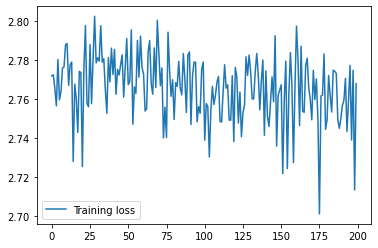

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.legend()
plt.show()

In [ ]:
# prediction for training set
with torch.no_grad():
    output = model(X_train.float())
    
softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions_train = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(y_train, predictions_train)

0.24734375

In [ ]:
with torch.no_grad():
    output = model(X_test.float())

softmax = torch.exp(output)
prob = list(softmax.numpy())
predictions_test = np.argmax(prob, axis=1)

In [ ]:
accuracy_score(y_test, predictions_test)

0.26104166666666667

In [ ]:
precision_score(y_test, predictions_test, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.31971487115371255

In [ ]:
f1_score(y_test, predictions_test, average='weighted')

0.10835330214270514

In [ ]:
recall_score(y_test, predictions_test, average='weighted')

0.26104166666666667

In [ ]:
recall_score(y_train, predictions_train, average='weighted')

0.24734375

In [ ]:
f1_score(y_train, predictions_train, average='weighted')

0.0981657671270387

In [ ]:
precision_score(y_train, predictions_train, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.31073968696286264